# Modern Pandas (Part 6)

* see: https://github.com/TomAugspurger/effective-pandas
* see: https://tomaugspurger.github.io/modern-6-visualization

In [20]:
import os
import feather
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set(context='talk', style='ticks')

%matplotlib inline

from pandas_datareader import fred

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv')

In [6]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# Matplotlib

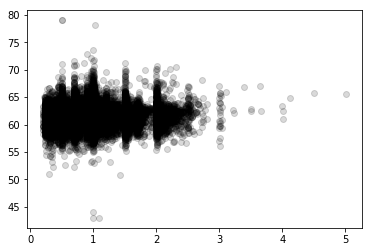

In [15]:
fig, ax = plt.subplots()

ax.scatter(x='carat', y='depth', data=df, c='k', alpha=.15);

# Pandas Built-in Plotting

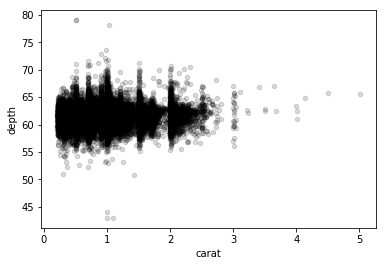

In [18]:
df.plot.scatter(x='carat', y='depth', c='k', alpha=.15);

In [24]:
gdp = fred.FredReader(['GCEC96', 'GPDIC96'], start='2000-01-01').read()

In [25]:
gdp.head()

,GCEC96,GPDIC96
DATE,,
2000-01-01,2476.222,2287.827
2000-04-01,2506.392,2424.549
2000-07-01,2501.218,2394.141
2000-10-01,2508.965,2395.566
2001-01-01,2546.270,2285.261


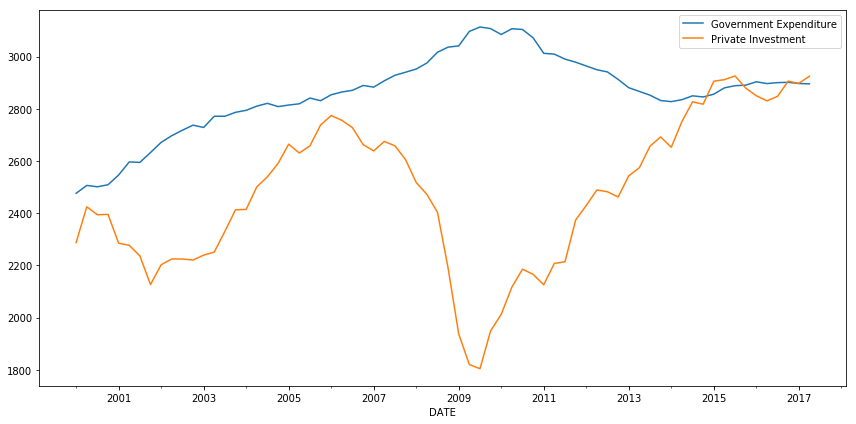

In [33]:
gdp.rename(columns={"GCEC96": "Government Expenditure", "GPDIC96": "Private Investment"}).plot(figsize=(12, 6))
plt.tight_layout()

# Seaborn

In [34]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [36]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [38]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

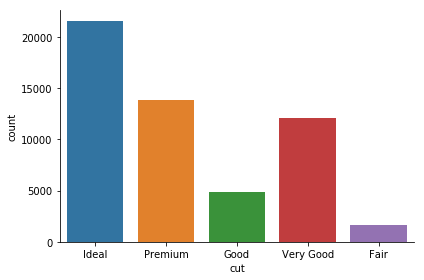

In [45]:
sns.countplot(x='cut', data=df)
sns.despine()
plt.tight_layout()

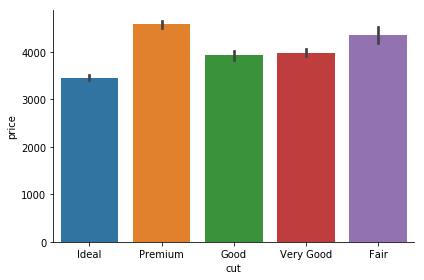

In [50]:
sns.barplot(x='cut', y='price', data=df)
sns.despine()
plt.tight_layout()

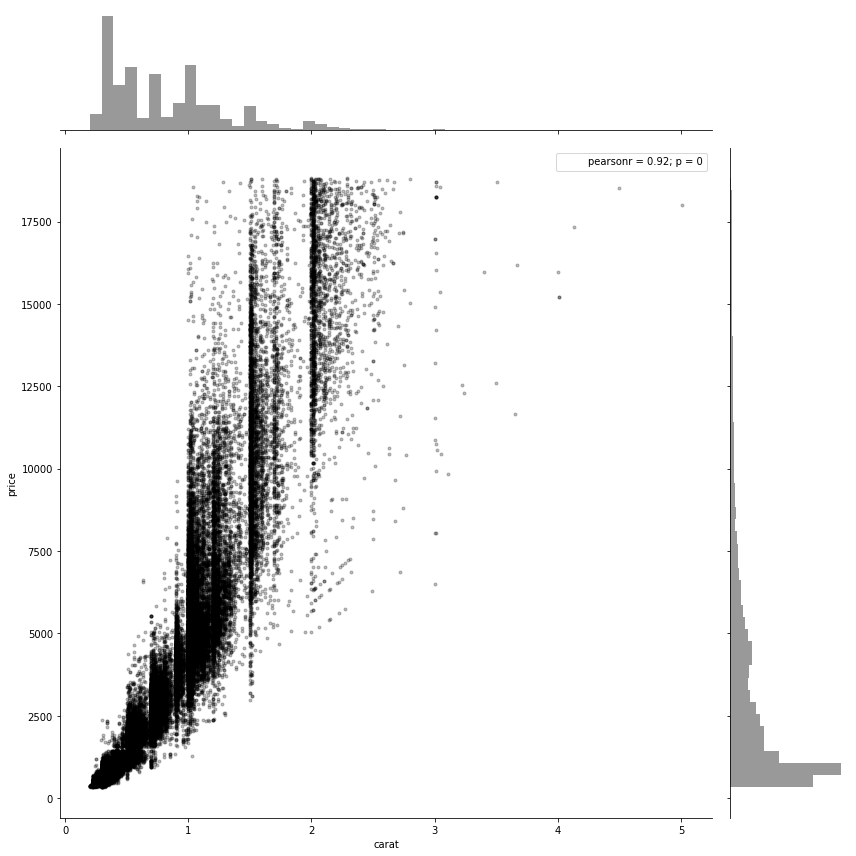

In [58]:
sns.jointplot(x='carat', y='price', data=df, size=12, alpha=.25, color='k', marker='.')
plt.tight_layout()

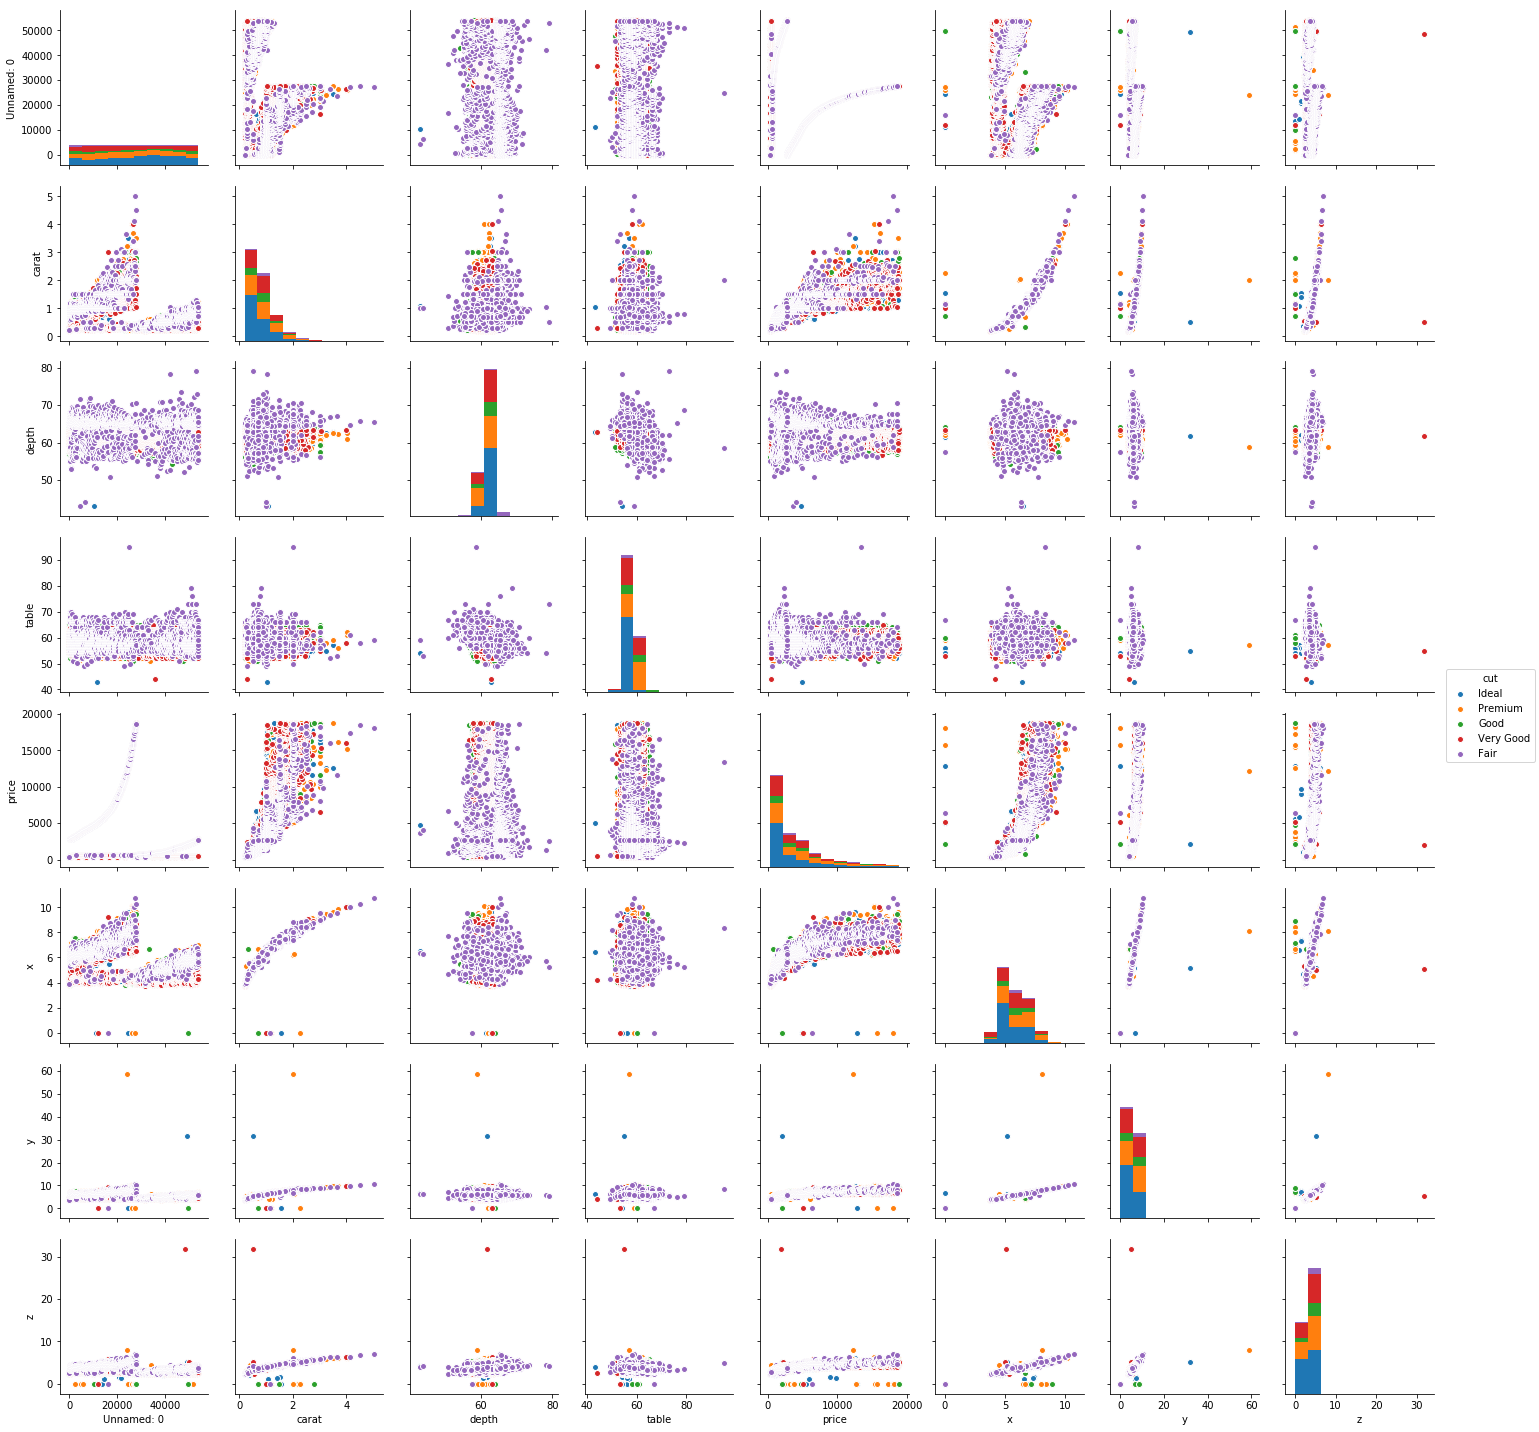

In [60]:
g = sns.pairplot(df, hue='cut')

In [61]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


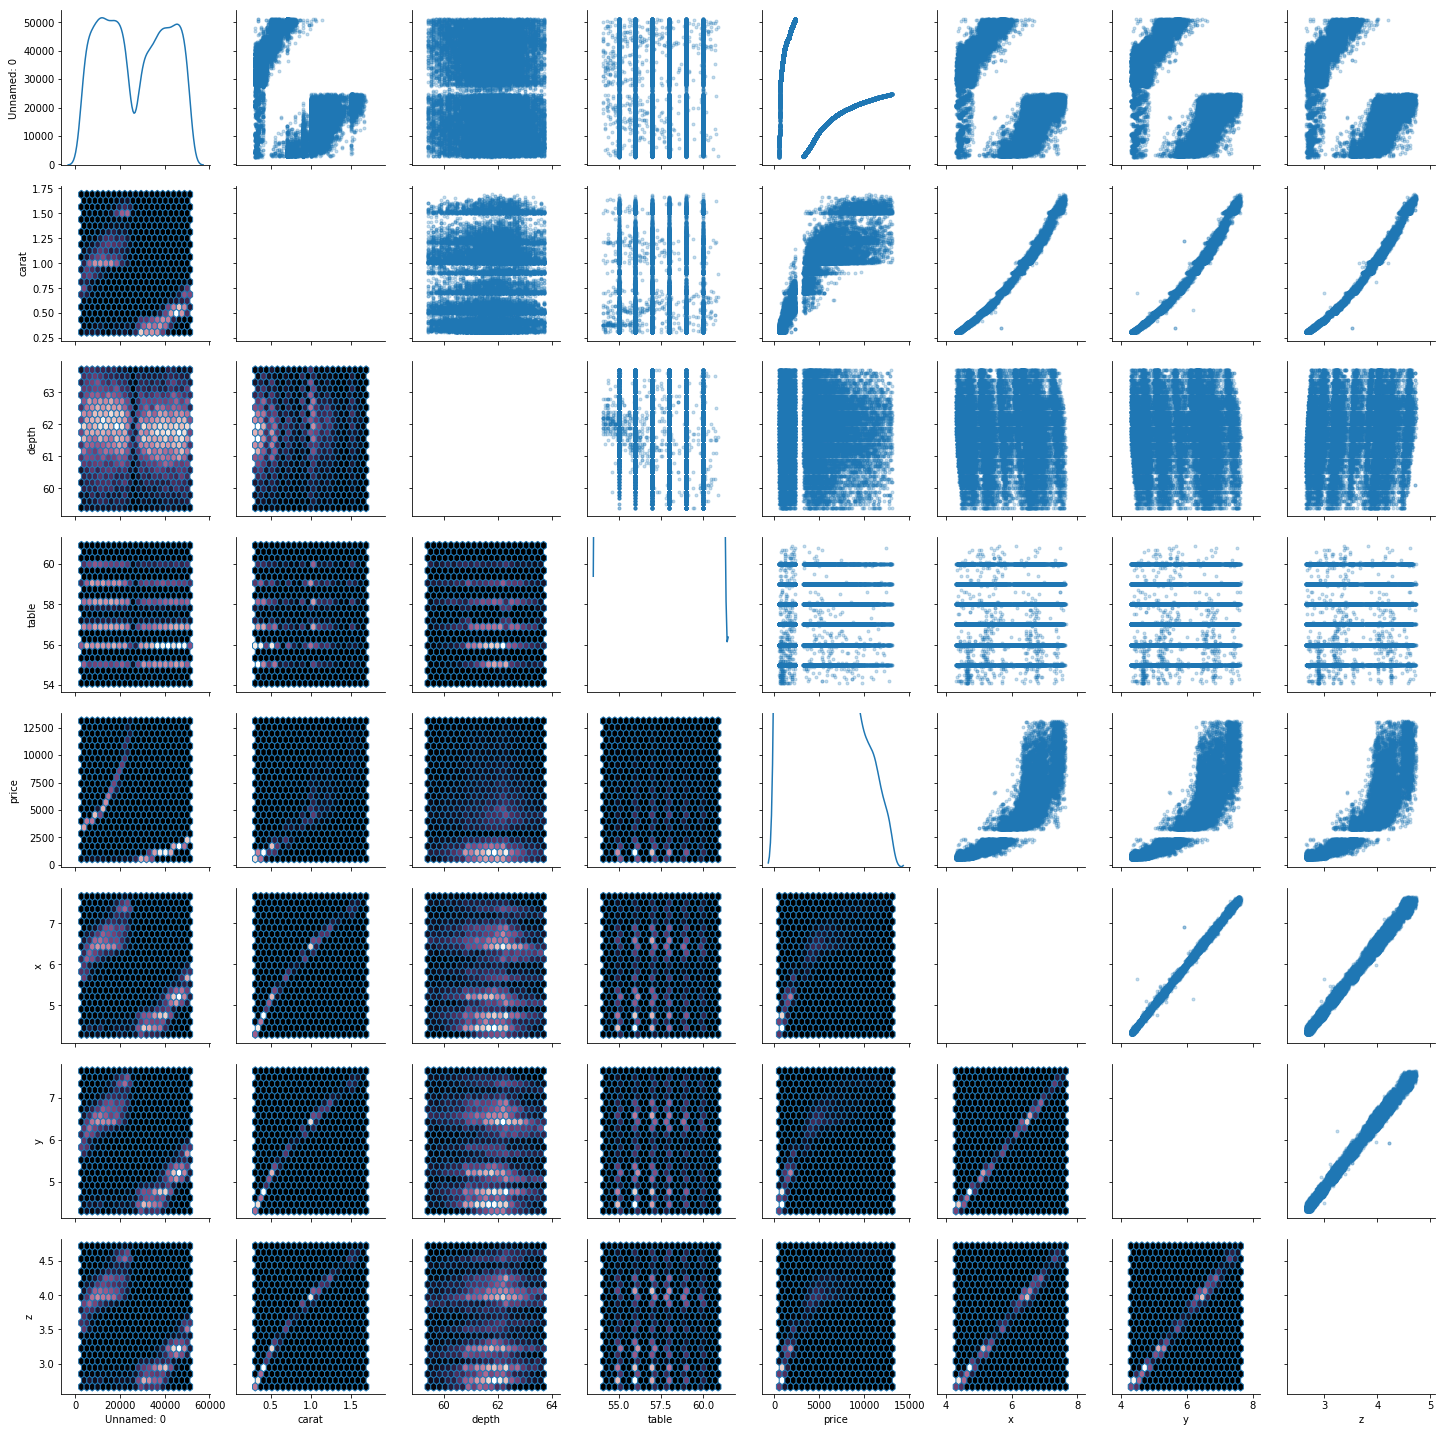

In [64]:
def core(df, α=.05):
    mask = (df > df.quantile(α)).all(1) & (df < df.quantile(1 - α)).all(1)
    return df[mask]

(df.select_dtypes(include=[np.number])
   .pipe(core)
   .pipe(sns.PairGrid)
   .map_upper(plt.scatter, marker='.', alpha=.25)
   .map_diag(sns.kdeplot)
   .map_lower(plt.hexbin, cmap=cmap, gridsize=20)
);

In [70]:
agged = df.groupby(['cut', 'color']).mean().sort_index().reset_index()
agged.head()

,cut,color,Unnamed: 0,carat,depth,table,price,x,y,z
0,Fair,D,22993.699387,0.920123,64.048466,58.969325,4291.061350,6.018344,5.963190,3.839877
1,Fair,E,24044.593750,0.856607,63.319643,59.364732,3682.312500,5.909063,5.858214,3.722143
2,Fair,F,24414.756410,0.904712,63.508013,59.453205,3827.003205,5.990513,5.931122,3.787821
3,Fair,G,26670.949045,1.023822,64.339809,58.773248,4239.254777,6.173822,6.114076,3.963153
4,Fair,H,22296.056106,1.219175,64.585149,58.696370,5135.683168,6.579373,6.497393,4.219373


In [71]:
agged.columns[:2]

Index(['cut', 'color'], dtype='object')

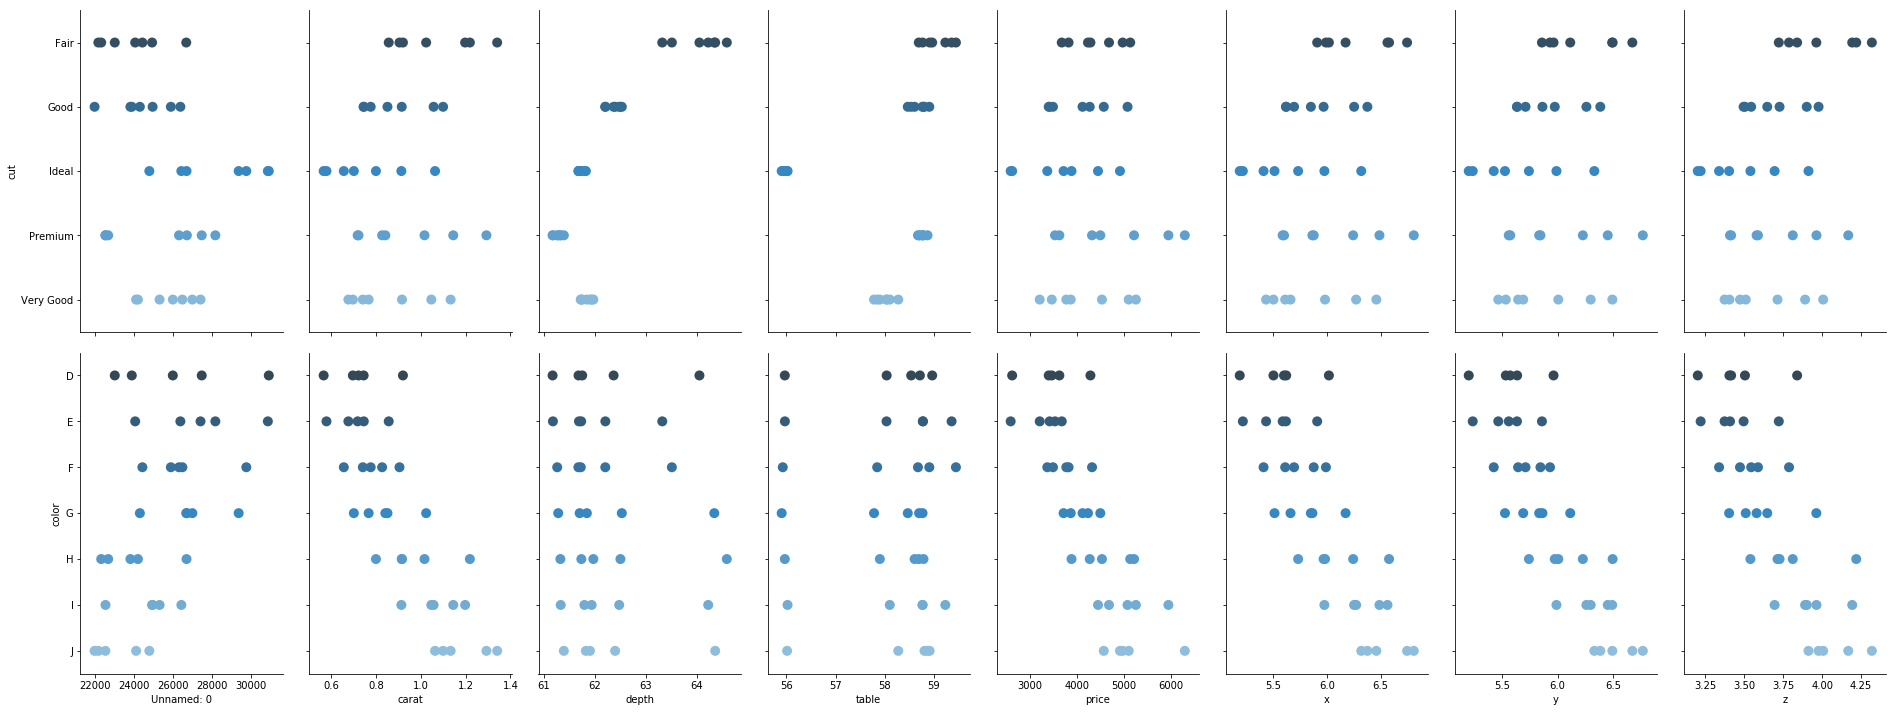

In [78]:
g = sns.PairGrid(agged, x_vars=agged.columns[2:], y_vars=['cut', 'color'], size=5, aspect=.65)
g.map(sns.stripplot, orient="h", size=10, palette='Blues_d');

In [84]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

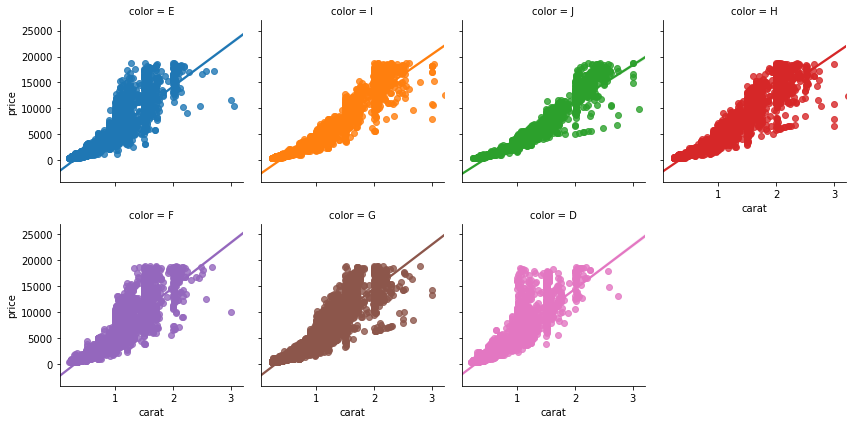

In [83]:
g = sns.FacetGrid(df, col='color', hue='color', col_wrap=4)
g.map(sns.regplot, 'carat', 'price');

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [86]:
df = sns.load_dataset('titanic')

In [87]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [88]:
clf = RandomForestClassifier()

param_grid = dict(max_depth=[1, 2, 5, 10, 20, 30, 40],
                                min_samples_split=[2, 5, 10],
                                min_samples_leaf=[2, 3, 5])

est = GridSearchCV(clf, param_grid=param_grid, n_jobs=4)

In [99]:
y = df['survived']
X = df.drop(['survived', 'who', 'alive'], axis=1)

In [105]:
pd.get_dummies(X, drop_first=False).head()

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,3,22.0,1,0,7.2500,True,False,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,False,False,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,False,True,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,False,False,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,True,True,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [106]:
pd.get_dummies(X, drop_first=True).head()

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton
0,3,22.0,1,0,7.2500,True,False,1,0,1,0,1,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,False,False,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,26.0,0,0,7.9250,False,True,0,0,1,0,1,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,False,False,0,0,1,0,0,0,1,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,True,True,1,0,1,0,1,0,0,0,0,0,0,0,1


In [107]:
X = pd.get_dummies(X, drop_first=True)
X = X.fillna(value=X.median())

In [109]:
X.shape

(891, 20)

In [108]:
X.head()

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton
0,3,22.0,1,0,7.2500,True,False,1,0,1,0,1,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,False,False,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,26.0,0,0,7.9250,False,True,0,0,1,0,1,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,False,False,0,0,1,0,0,0,1,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,True,True,1,0,1,0,1,0,0,0,0,0,0,0,1


In [111]:
%%time
est.fit(X, y)

CPU times: user 358 ms, sys: 63.8 ms, total: 422 ms
Wall time: 2.58 s


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_depth': [1, 2, 5, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [112]:
scores = pd.DataFrame(est.cv_results_)
scores.head()

,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params
0,0.720539,0.804714,0.797980,0.774411,0.038192,61,0.765993,0.779461,0.799663,0.781706,0.013837,0.053028,0.011363,0.003504,0.000401,1,2,2,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s..."
1,0.720539,0.771044,0.757576,0.749719,0.021354,63,0.765993,0.734007,0.757576,0.752525,0.013538,0.043506,0.006450,0.002783,0.000414,1,2,5,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s..."
2,0.747475,0.771044,0.791246,0.769921,0.017887,62,0.760943,0.734007,0.821549,0.772166,0.036609,0.029643,0.004962,0.003326,0.000232,1,2,10,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s..."
3,0.754209,0.804714,0.804714,0.787879,0.023808,54,0.791246,0.782828,0.797980,0.790685,0.006198,0.033632,0.004688,0.005507,0.003739,1,3,2,"{'max_depth': 1, 'min_samples_leaf': 3, 'min_s..."
4,0.777778,0.801347,0.771044,0.783389,0.012992,60,0.819865,0.779461,0.794613,0.797980,0.016666,0.025244,0.002315,0.002414,0.000041,1,3,5,"{'max_depth': 1, 'min_samples_leaf': 3, 'min_s..."


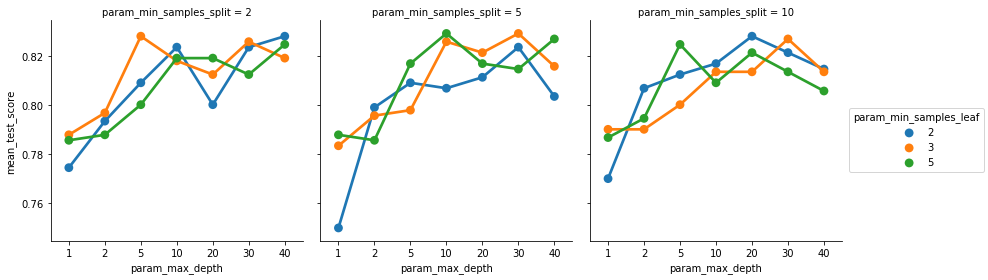

In [116]:
sns.factorplot(x='param_max_depth',
                          y='mean_test_score',
                          col='param_min_samples_split',
                          hue='param_min_samples_leaf',
                          data=scores);